In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 60

In [3]:
#utils.py is where all our custorm functions live is we set an autoreload on it.
%aimport utils 
from utils import *

In [4]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)

# The data

In [5]:
df_all = pd.read_excel('all data v3.xlsx', 'iLab data.txt', index_col=None, na_values=['NA'])

### Preparing a test sample
Let's first use a particular session as a test case. We extract only the data relevant to that case

In [6]:
df_test = prepare_session(df_all,'L-2567b17a:120eda25685:-8000')
df_gaps = prepare_session(df_all,'L-10f11766:120ecd4f63a:-8000')

After removin 'incorrect' actions, we are left with 212 rows out of 285
After removin 'incorrect' actions, we are left with 207 rows out of 288


# The plot

In [7]:
colors = {"":"white",
         "Now try working on this new example":"#252525",
         "intuition": "#969696",
         "single value": "red",
         'Central tendency': "#33a02c",
         'extrapolated range': "#6a3d9a",
#          'Average': "#6a3d9a",
#          'Sum': "#1f78b4",
          'Count gaps': "#1f78b4",
          'range': "#1f78b4",
         'Count all': "#ff7f00",
         'evaluation steps': "#525252",
        }
column_to_use = {"Now try working on this new example":"Feedback Text",
                 "intuition": "Selection",
                 "submit": "Selection",
                 "evaluation": "Selection",
                 "checkIntuition": "Selection",
                 'Median': 'Cleaned method 1',
                 'Average': 'Cleaned method 1',
                 'Sum': 'Cleaned method 1',
                 'Count all': 'Cleaned method 1',
                }

function_to_use = {"":case_usage,
                   "single value":single_value_usage,
                   "Central tendency":central_tendency_usage,
                   "range":range_usage,
                   "extrapolated range":extrapolated_range_usage,
                   "Count gaps":count_gaps_usage,
                   "evaluation steps":evaluation_steps_usage}

to_plot = ["","intuition",'single value','Central tendency','range',"extrapolated range","Count gaps",'Count all',"evaluation steps"]

In [8]:
def plot(df,to_plot,colors, column_to_use, function_to_use):
    fig = plt.figure(figsize=(18,9))
    ax = plt.subplot()
    spacing =10
    pos = 0
    max_time = 0
    actions = list(reversed(to_plot))
    black = '#252525'
    for i,action in enumerate(actions):
        if action == "":
            cases = all_cases(df)
            for case,coords in all_cases(df).items():
                left = [float(x) for x in case[0].split(" ")]
                right = [float(x) for x in case[1].split(" ")]
                ymax = max(max(left),max(right))
                ymin = min(min(left),min(right))
                Xl = [coords[0]+30]*len(left)
                Yl = [l/(ymax)*(spacing-2.5)+1+pos for l in left]
                Xr = [coords[0]+30+20]*len(right)
                Yr = [r/(ymax)*(spacing-2.5)+1+pos for r in right]
                ax.plot(Xl,Yl,'.',color="darkgrey",markersize=10)
                ax.plot(Xr,Yr,'.',color="darkgrey",markersize=10)
        if action in column_to_use.keys():
            action_use = action_usage(df,column_to_use[action],action)
        else:
            action_use = function_to_use[action](df)
        if action_use:
            max_time = max(max_time,sum(action_use[-1]))
            ax.broken_barh(action_use,(pos,spacing),facecolors=colors[action],alpha=1,linewidth=0)
        pos += spacing

        
#     ax.text(180,-5,'solution 1',fontsize=12)



#     #Add horizontal bar
#     ax.broken_barh([(0,ax.get_xlim()[1])],((len(actions))*spacing,spacing),facecolors='white',alpha=1,linewidth=0)

    #Add new case bar
    new_case = "Now try working on this new example"
    action_use = action_usage(df,column_to_use[new_case],new_case)
    case_use = [(x,10) for (x,y) in action_use]+[(0,10)]
    max_time = max(max_time,sum(action_use[-1]))
    ax.broken_barh(case_use,(0,(len(actions))*spacing),facecolors="white",alpha=1,linewidth=0)

    ax.set_xlabel('minutes in activity')
    ax.set_xticks(range(0,int(max_time),60))
    ax.set_xticklabels([str(x/60)+''if x in range(0,int(max_time),60*5) else "" for x in range(0,int(max_time),60)])
    ax.set_yticks(range(spacing/2,len(actions)*spacing,spacing))
    ax.set_yticklabels(actions)
    ax.grid(True)
    plt.show()

### Session with gap counting

utils.py:154: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return zip(df[df[column].str.contains(action,na=False)]['Time_seconds'],df[df[column].str.contains(action,na=False)]['Duration'])
utils.py:170: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return zip(df[df[column].str.match(action,as_indexer=True)]['Time_seconds'],df[df[column].str.match(action,as_indexer=True)]['Duration'])
C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


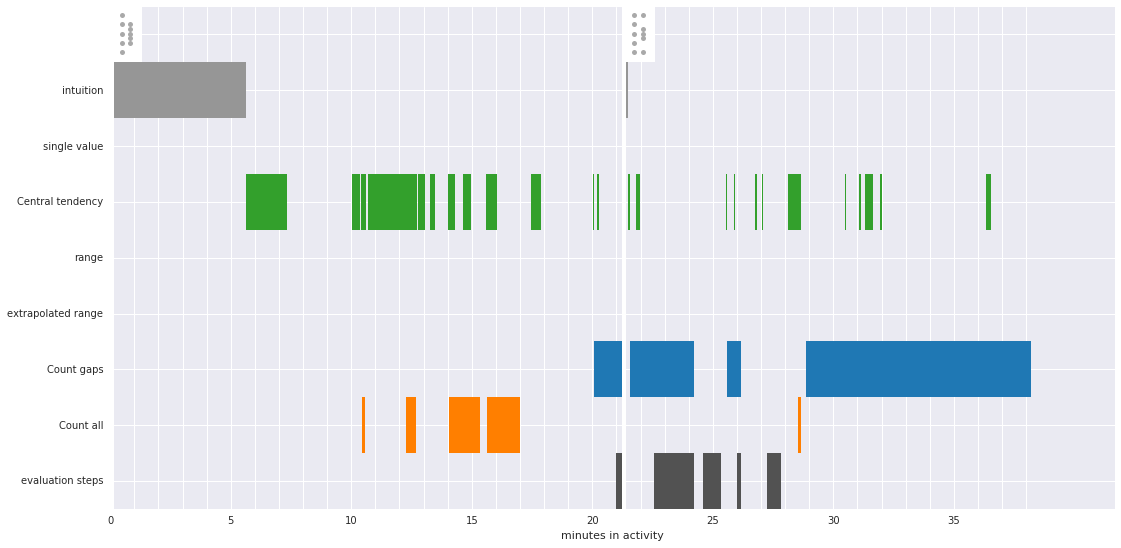

In [9]:
plot(df_gaps,to_plot,colors, column_to_use, function_to_use)

### Session with range and extrapolated range

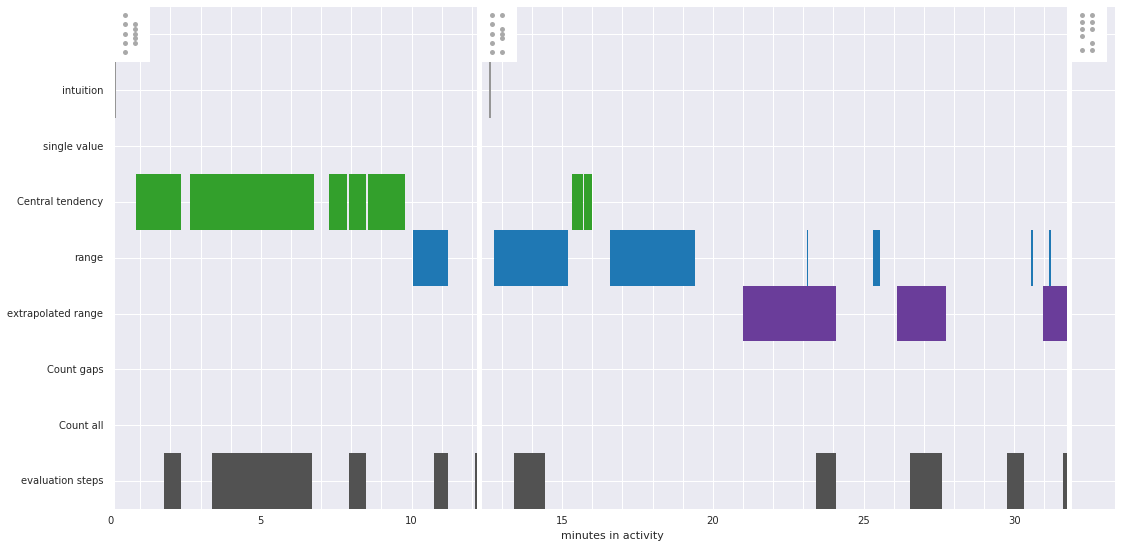

In [10]:
plot(df_test,to_plot,colors, column_to_use, function_to_use)

### TODO
Ordered in some kind of general priority (in terms of need of feedback and desired feature)
* start implementing categories that are under “option 4” in the coding document (see copy below from May 29th)
* display method at "max", after a submit or delete all/reset
* add case data to graph
* display method at "max", after a submit or delete all/reset
* merge evaluation and checkintuition
* Indicate when current method could be used to “crack” or solve the contrasting cases. (‘when it works’) => correct order. 

### Overall graph structure:
Row 1: intuition
Rows 2-n: methods
Plot “build” events (any click in that part of the interface).
Below, show the method in writing.
Row n+1: Submit
Row n+2: Evaluation (merge Evaluate, Check Intuition).
Later consider merging “submit” into this. 
 
Plot building events, not durations 
Pauses become gaps. 



#### Categories
1. single value -DONE
* Central tendency, ready made -DONE
* Combination of ready made, random
* Range 6 - 1 -DONE
* Count gaps (if numbers are 1 4 4 6)
    * click all empty points within range - 2 3 5 -DONE
    * click all empty points within the largest gap - 2 3
* Extrapolated range
    * Inner range 4-4 - single step method 
    * Any method that uses more than extreme values, and some form of subtraction. 
        * Recursive range (6-1) +/- (4-4) -DONE to 1 layer
        * All pairwise ranges (6-1, 6-4, 4-4, 4-1)
* count all -DONE
* Canonical -DONE
